chapter 3 code and notes

3.1.1 Standardization
mean = 0, variance = 1

In [20]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')

#sns.get_dataset_names see what else is out there
print(titanic_data.dtypes)
titanic_data.head(5)


survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [21]:
titanic_data = titanic_data[["age", "fare", "pclass","survived","sibsp","parch"]]
titanic_data.head()
print(titanic_data.describe())


              age        fare      pclass    survived       sibsp       parch
count  714.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean    29.699118   32.204208    2.308642    0.383838    0.523008    0.381594
std     14.526497   49.693429    0.836071    0.486592    1.102743    0.806057
min      0.420000    0.000000    1.000000    0.000000    0.000000    0.000000
25%     20.125000    7.910400    2.000000    0.000000    0.000000    0.000000
50%     28.000000   14.454200    3.000000    0.000000    0.000000    0.000000
75%     38.000000   31.000000    3.000000    1.000000    1.000000    0.000000
max     80.000000  512.329200    3.000000    1.000000    8.000000    6.000000


looking at the int vars <br />
age: ~180 missing, not categorical/binary <br />
fare: no missing but has min = 0 ?  <br />
pclass: cat, redudant with class <br />
survived: bin<br />
sibsp: cat<br />
parch: cat<br />
deviating from the textbook because I dont think it makes sense to scale pclass when pclass is a int representation of a categorical variable

In [22]:
titanic_data = titanic_data[["age", "fare"]]
titanic_data.describe()



,age,fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(titanic_data)

titanic_data_scaled = scaler.transform(titanic_data)
# convert from numpy array to pd.df
titanic_data_scaled.shape


(891, 2)

In [30]:
titanic_data_scaled = pd.DataFrame(titanic_data_scaled, columns=titanic_data.columns)
titanic_data_scaled.head()

,age,fare
0,-0.530377,-0.502445
1,0.571831,0.786845
2,-0.254825,-0.488854
3,0.365167,0.420730
4,0.365167,-0.486337


<AxesSubplot: xlabel='age', ylabel='Density'>

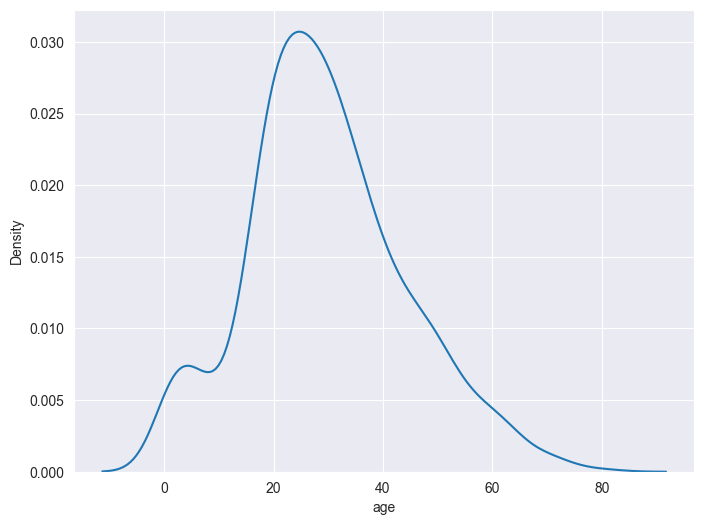

In [31]:
sns.kdeplot(titanic_data['age'])

<AxesSubplot: xlabel='age', ylabel='Density'>

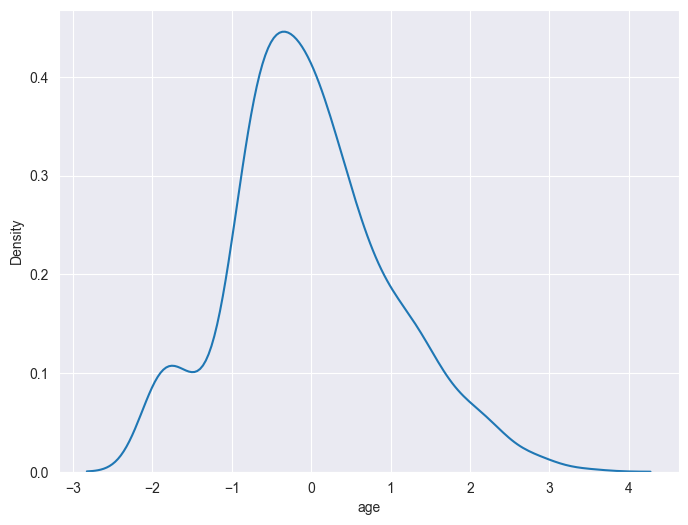

In [32]:
sns.kdeplot(titanic_data_scaled["age"])

3.1.2 min/max scaling <br />
subtract each value by the minimum value and then divide the result by the different of minimum and maximum value in the dataset

In [39]:
titanic_data.head()
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()
scaler.fit(titanic_data)

titanic_data_mmscaled = scaler.transform(titanic_data)
titanic_data_mmscaled.shape

titanic_data_mmscaled = pd.DataFrame(titanic_data_mmscaled, columns=titanic_data.columns)
titanic_data_mmscaled.head()

,age,fare
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713


<AxesSubplot: xlabel='age', ylabel='Density'>

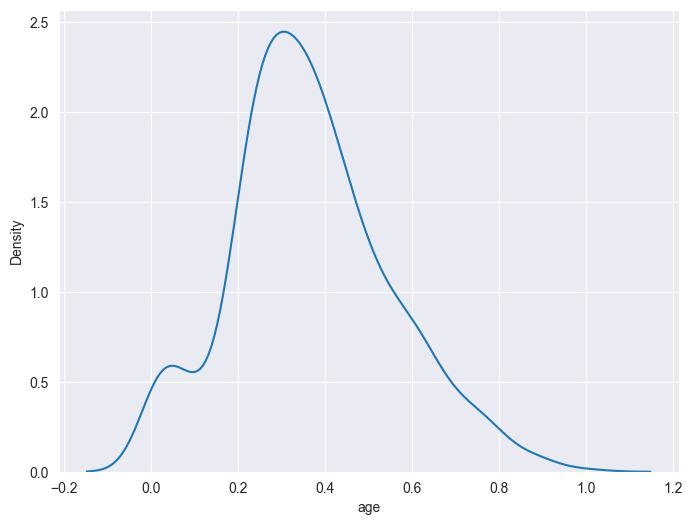

In [42]:
sns.kdeplot(titanic_data_mmscaled['age'])

3.1.3 Mean Normalization 

In [49]:
mean_vals = titanic_data.mean(axis=0)
range_vals = titanic_data.max(axis=0) - titanic_data.min(axis=0)
print(range_vals)

age      79.5800
fare    512.3292
dtype: float64


In [51]:
titanic_data_munorm = (titanic_data-mean_vals)/range_vals
titanic_data_munorm

,age,fare
0,-0.096747,-0.048707
1,0.104309,0.076277
2,-0.046483,-0.047390
3,0.066611,0.040786
4,0.066611,-0.047146
...,...,...
886,-0.033917,-0.037484
887,-0.134445,-0.004302
888,NaN,-0.017087
889,-0.046483,-0.004302


<AxesSubplot: xlabel='age', ylabel='Density'>

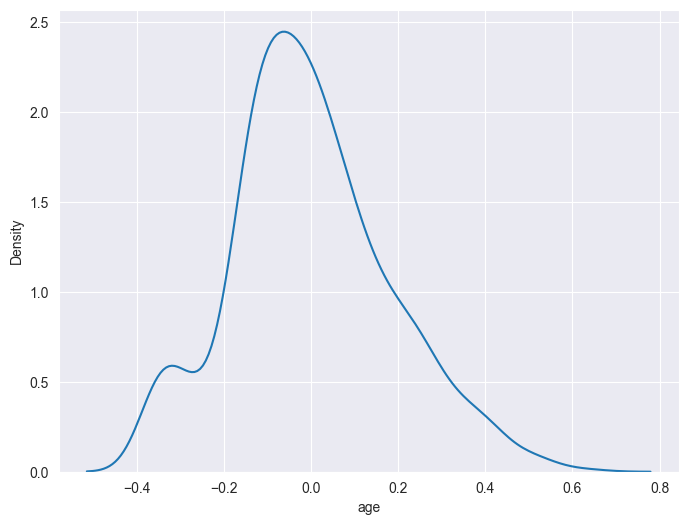

In [52]:
sns.kdeplot(titanic_data_munorm["age"])